In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# Plotting settings

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
#sns.set_context('notebook')
#sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
timeformat = mdates.DateFormatter('%H:%M')
wavelengts = [355,532,1064]
colors = ["darkblue", "darkgreen","darkred"]

Generate some random two-dimensional data:

In [3]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [4]:
m1, m2 = measure(200)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

Perform a kernel density estimate on the data:

In [5]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)#,bw_method='silverman')
Z = np.reshape(kernel(positions).T, X.shape)

Perform a resample from the estimated density of the data:

In [6]:
[n1,n2] = kernel.resample(40,seed=1234)

Choose 30 points with best score

In [7]:
scores_new = kernel(np.vstack([n1, n2]))
ind = np.argpartition(scores_new, -30)[-30:]
#plt.plot(scores_new)
#plt.show()

max_n1,max_n2 = n1[ind],n2[ind]
#max_n1,max_n2

random sample for a given y
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

In [11]:
y_choose = 1.1
Y.ravel()

array([-3.16270674, -3.09228885, -3.02187096, ...,  3.66782843,
        3.73824631,  3.8086642 ])

Plot the results:

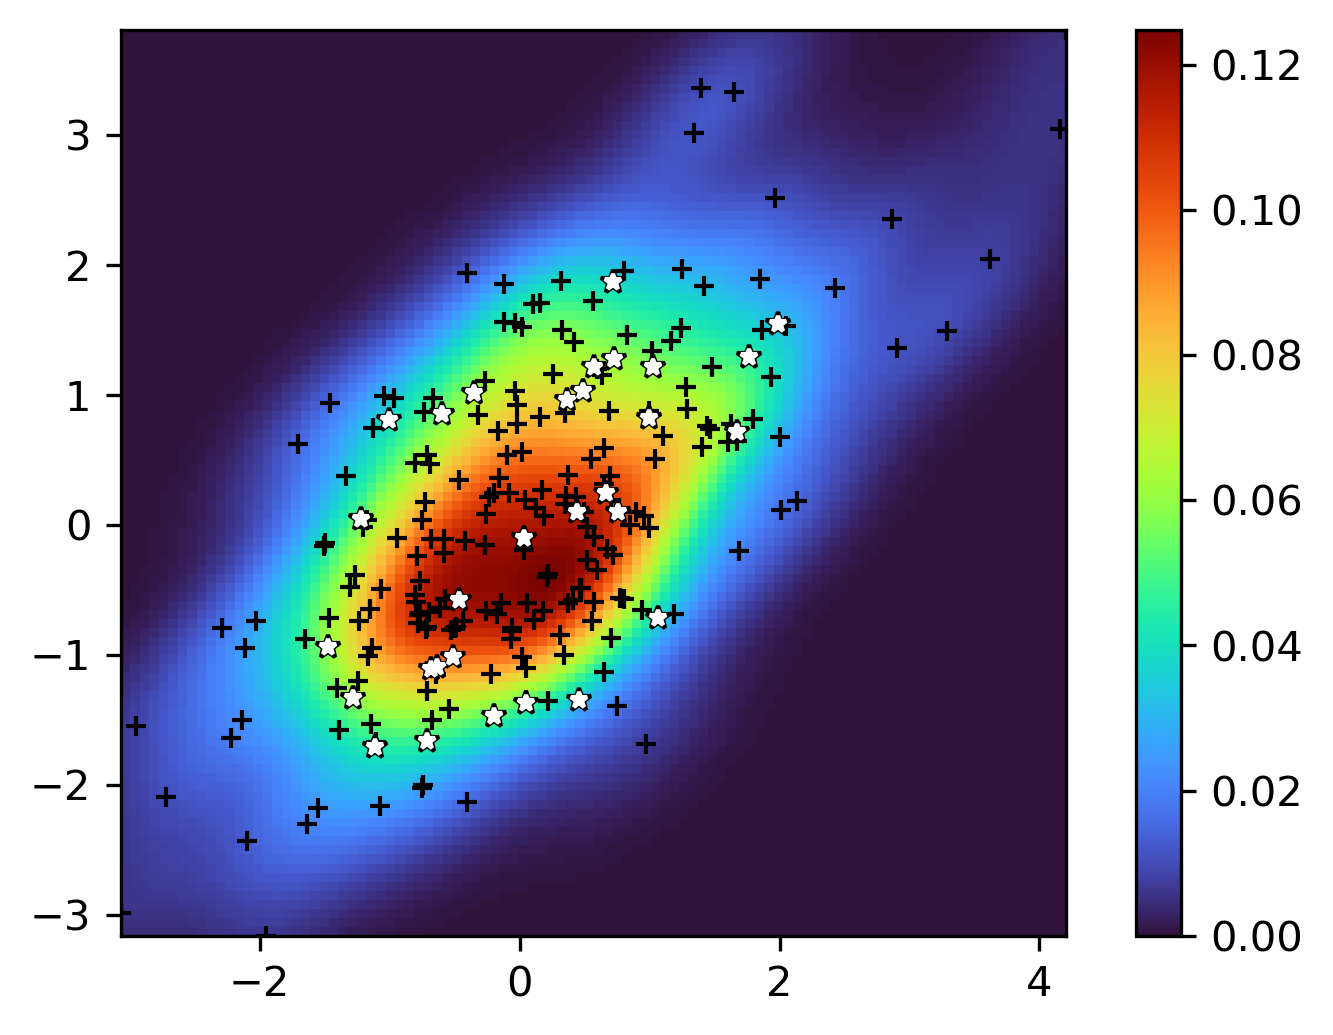

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(np.rot90(Z), cmap='turbo',# plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k+', markersize=5)
#ax.plot(n1, n2, 'm+', markersize=3)
ax.plot(max_n1, max_n2, 'k*', markersize=6)
ax.plot(max_n1, max_n2, 'w*', markersize=4)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
fig.colorbar(im, ax=ax)

plt.show()